## Clustering E-Commerce Customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


## MELAKUKAN EDA

In [3]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


Interpretasi Statistik Deskriptif

- Dari hasil statistik deskriptif diatas dapat dilihat bahwa ada missing value pada kolom Umur dan kolom 'Skor Belanja (1-100)' dikarenakan kolom 'ID_pelanggan' dan 'Pendapatan pertahun(juta)' memiliki total 250 sedangkan kolom Umur hanya 245 begitu pula dengan kolom 'Skor Belanja (1-100)' yang hanya memiliki 246 values.

- Kolom 'Skor Belanja (1-100)' mempunyai outlier dikarenakan kolom tersebut mempunyai nilai max 150 padahal batasan nilai dalam kolom ini hanya 1-100.

- Distribusi pada kolom 'Umur' bukanlah merupakan distribusi normal, melainkan merupakan distribusi yang mengalami skewed positif / right skewed. Bisa dilihat dari nilai mean yang lebih besar dari median, hal ini dapat disebabkan oleh adanya outlier.

- Distribusi pada kolom 'Pendapatan pertahun (juta)' juga bukanlah distribusi normal, melainkan merupakan distribusi yang mengalami skewed negatif / left skewed. Bisa dilihat dari nilai mean yang lebih kecil dari nilai median, hal ini dapat disebabkan oleh adanya outlier.

- Kolom-kolom yang mempunyai nilai outlier, harus segera dihilangkan outliernya karna jika tidak akan mempengaruhi performa akurasi dari model machine learning yang dibuat.

**UNIVARIATE ANALYSIS**

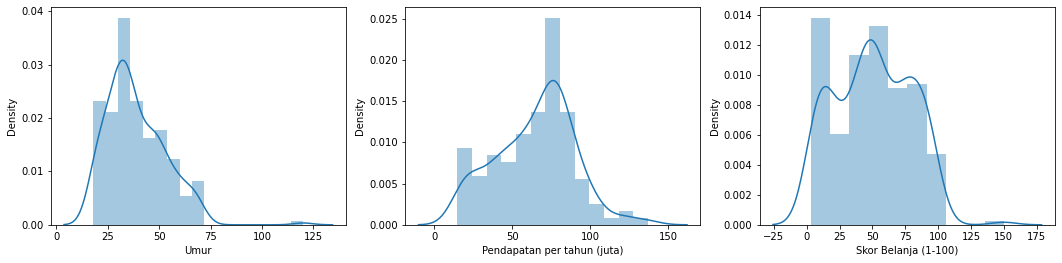

In [4]:
fig,axs = plt.subplots(1,3, figsize=(18,4))

sns.distplot(ax = axs[0], x= df['Umur'])
sns.distplot(ax = axs[1], x= df['Pendapatan pertahun (juta)'])
sns.distplot(ax = axs[2], x= df['Skor Belanja (1-100)'])


axs[0].set_yticks([0.00,0.01,0.02,0.03,0.04])
axs[0].set_xticks([0,25,50,75,100,125])
axs[0].set_xlabel('Umur')
axs[1].set_yticks([0.000,0.005,0.010,0.015,0.020,0.025])
axs[1].set_xticks([0,50,100,150])
axs[1].set_xlabel('Pendapatan per tahun (juta)')
axs[2].set_yticks([0.000,0.002,0.004,0.006,0.008,0.010,0.012,0.014])
axs[2].set_xlabel('Skor Belanja (1-100)')

plt.show()

**MULTIVARIATE ANALYSIS**

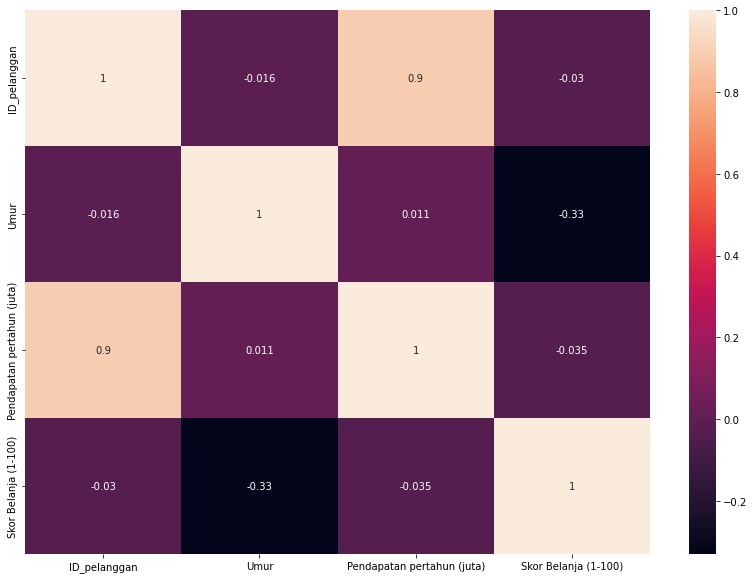

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Adanya korelasi lemah (arah negatif) antara feature Umur dan feature Skor Belanja (1-100). Kedua feature ini selanjutnya digunakan dalam pemodelan machine learning.

## MELAKUKAN HANDLING MISSING VALUE

In [6]:
''' Banyak metode untuk mengisi missing value biasanya jika data mengalami skewness akan digunakan median untuk mengisi
missing value tersebut. Namun pada kali ini metode yang digunakan adalah ffill (isi data kosong dengan nilai baris diatasnya)'''

df['Skor Belanja (1-100)'] = df['Skor Belanja (1-100)'].fillna(method = 'ffill')
df['Umur'] = df['Umur'].fillna(method = 'ffill')

## MELAKUKAN HANDLING OUTLIER

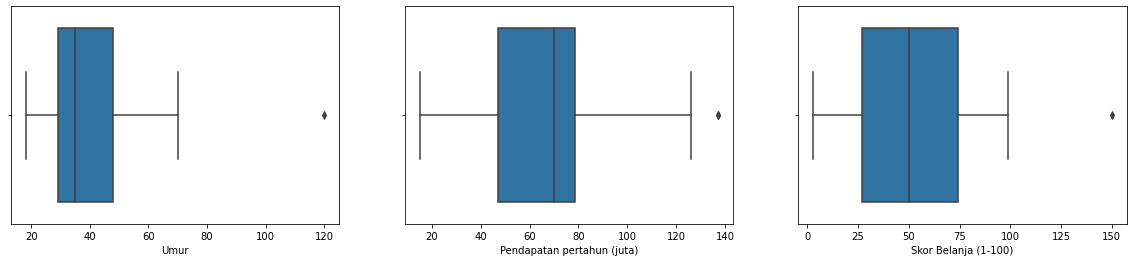

In [7]:
# CEK DISTRIBUSI UNTUK SETIAP FEATURES
fig,axs = plt.subplots(1,3, figsize=(20,4))
sns.boxplot(ax = axs[0], x= df['Umur'])
sns.boxplot(ax = axs[1], x= df['Pendapatan pertahun (juta)'])
sns.boxplot(ax = axs[2], x= df['Skor Belanja (1-100)'])
axs[2].set_xticks([0,25,50,75,100,125,150])
plt.show()

Dapat kita lihat bahwa kolom 'Umur', 'Pendapatan pertahun (juta)' dan 'Skor Belanja (1-100)' memiliki outlier, maka harus dilakukan outlier handling untuk ketiga kolom tersebut

In [8]:
#UMUR
Q1_umur = df['Umur'].quantile(0.25)
Q3_umur = df['Umur'].quantile(0.75)
IQR = Q3_umur-Q1_umur
batas_bawah_umur = Q1_umur- (1.5*IQR)
batas_atas_umur = Q3_umur+ (1.5*IQR)

#PENDAPATAN PERTAHUN(JUTA)
Q1_pendapatan = df['Pendapatan pertahun (juta)'].quantile(0.25)
Q3_pendapatan = df['Pendapatan pertahun (juta)'].quantile(0.75)
IQR = Q3_pendapatan-Q1_pendapatan
batas_bawah_pendapatan = Q1_pendapatan- (1.5*IQR)
batas_atas_pendapatan = Q3_pendapatan+ (1.5*IQR)

#SKOR BELANJA(1-100)
Q1_skrbelanja = df['Skor Belanja (1-100)'].quantile(0.25)
Q3_skrbelanja = df['Skor Belanja (1-100)'].quantile(0.75)
IQR = Q3_skrbelanja-Q1_skrbelanja
batas_bawah_skrbelanja = Q1_skrbelanja- (1.5*IQR)
batas_atas_skrbelanja = Q3_skrbelanja+ (1.5*IQR)


df2 = df[((df['Umur'] > batas_bawah_umur) & (df['Umur'] < batas_atas_umur)) &
        ((df['Pendapatan pertahun (juta)'] > batas_bawah_pendapatan) & (df['Pendapatan pertahun (juta)'] < batas_atas_pendapatan)) &
        ((df['Skor Belanja (1-100)'] > batas_bawah_skrbelanja) & (df['Skor Belanja (1-100)'] < batas_atas_skrbelanja))]
df2.dropna()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
244,245,Laki-laki,27.0,88,69.0
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0


**PEMODELAN MACHINE LEARNING**

In [9]:
from sklearn.preprocessing import StandardScaler
df_cluster = df2[['Umur','Skor Belanja (1-100)']]
sc = StandardScaler()
df_cluster_std = sc.fit_transform(df_cluster)

In [10]:
#coba menggunakan n_clusters = 2
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=2).fit(df_cluster_std)
labels_1 = kmeans_1.labels_
new_df_cluster = pd.DataFrame(data=df_cluster_std, columns = ['Umur','Skor Belanja (1-100)'])
new_df_cluster['label_kmeans1'] = labels_1

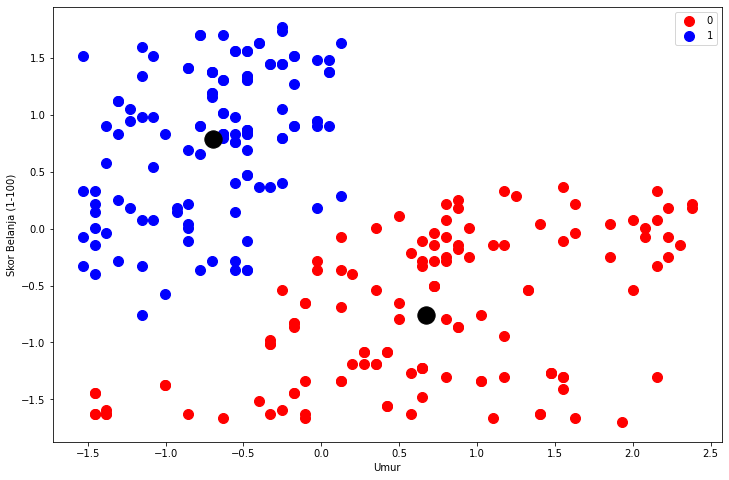

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(new_df_cluster['Umur'][new_df_cluster['label_kmeans1']==0],
            new_df_cluster['Skor Belanja (1-100)'][new_df_cluster['label_kmeans1']==0],c='red',s=100,label=0)
plt.scatter(new_df_cluster['Umur'][new_df_cluster['label_kmeans1']==1],
            new_df_cluster['Skor Belanja (1-100)'][new_df_cluster['label_kmeans1']==1],c='blue',s=100,label=1)
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=300)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.show()

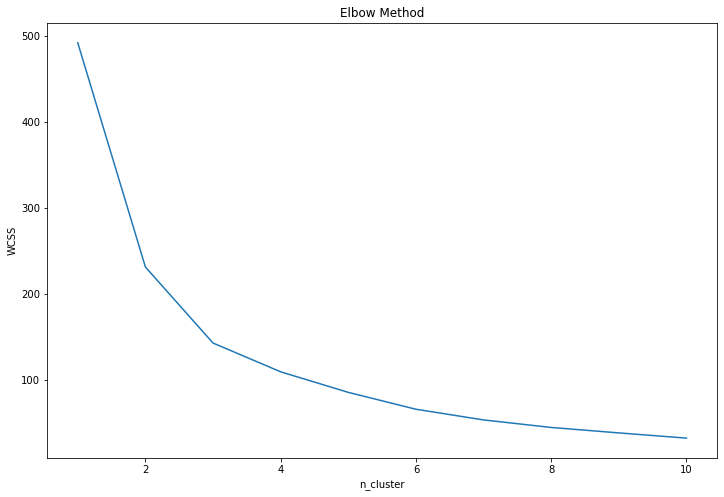

In [12]:
# MENGECEK APAKAH n_cluster = 2 sudah optimal

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_cluster_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('n_cluster')
plt.show()

Ternyata dari hasil visualisasi elbow method diatas menghasilkan ketika n_cluster=3 tidak lagi menghasilkan cluster yang lebih homogen secara signifikan dibandingkan sebelunya. Maka dari itu gunakan n_clusters = 3.

In [13]:
kmeans_2 = KMeans(n_clusters=3).fit(df_cluster_std)
labels_2 = kmeans_2.labels_
new_df_cluster_2 = pd.DataFrame(data=df_cluster_std, columns = ['Umur','Skor Belanja (1-100)'])
new_df_cluster_2['label_kmeans2'] = labels_2

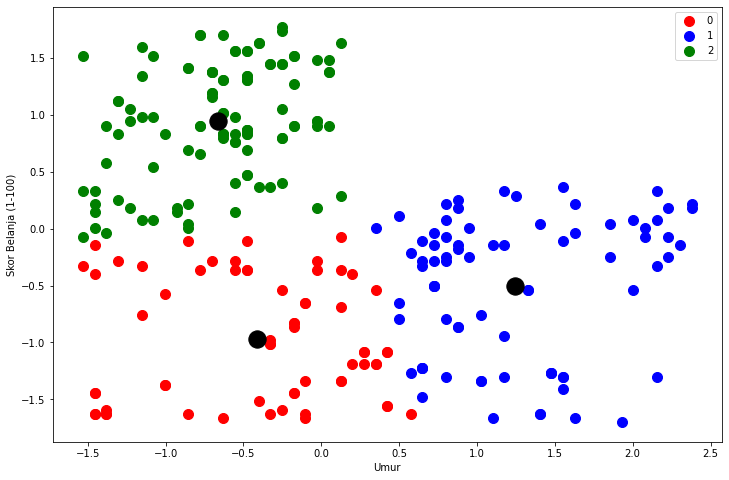

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(new_df_cluster_2['Umur'][new_df_cluster_2['label_kmeans2']==1],
            new_df_cluster_2['Skor Belanja (1-100)'][new_df_cluster_2['label_kmeans2']==1],c='red',s=100,label=0)
plt.scatter(new_df_cluster_2['Umur'][new_df_cluster_2['label_kmeans2']==2],
            new_df_cluster_2['Skor Belanja (1-100)'][new_df_cluster_2['label_kmeans2']==2],c='blue',s=100,label=1)
plt.scatter(new_df_cluster_2['Umur'][new_df_cluster_2['label_kmeans2']==0],
            new_df_cluster_2['Skor Belanja (1-100)'][new_df_cluster_2['label_kmeans2']==0],c='green',s=100,label=2)
centers = kmeans_2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=300)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
print(f'Skor untuk k = 2 : {silhouette_score(new_df_cluster,labels=labels_1)}')
print(f'Skor untuk k = 3 : {silhouette_score(new_df_cluster_2,labels=labels_2)}')

Skor untuk k = 2 : 0.5347833867833213
Skor untuk k = 3 : 0.5468021574598199


Dari hasil silhouette score diatas dapat disimpulkan bahwa dengan menggunakan cluster = 3, maka kita lebih dapat membedakan serta mengambil insight dari hasil tersebut dibandingkan menggunakan cluster = 2.

# Soal 8. Analyze clustering result

Dari hasil klustering dapat dilihat kebanyakan bahwa skor belanja yang besar dimiliki oleh customer yang memiliki usia yang muda, dan bersamaan dengan peningkatan umur maka skor belanja juga berkurang. Mungkin hal ini disebabkan bahwa pada umur muda produktivitas akan lebih tinggi dan gaya juga hidup yang lebih konsumtif. Sedangkan semakin bertambahnya umur maka produktivitas akan berkurang jauh dimana gaya hidup yang konsumtif akan semakin berkurang seiring dengan berkurangnya penghasilan (akibat penurunan produktivitas). Namun dibutuhkan penelitian lebih lanjut mengenai hal tersebut mungkin bisa menggunakan experimental design seperti A/B testing untuk membuktikan hipotesis tersebut. Oleh sebab itu tim marketing bisa membuat campaign dengan target sasaran lebih ke para customer yang berusia, misalkan dengan memberikan voucher cashback/gratis ongkir, dll.